Jasleen Kaur Chadha
045023

# 1. PROJECT OBJECTIVES

**1.a Group Electronic ADs into distinct segments using unsupervised machine learning clustering algorithms.**
1. Identify relevant data points like membership level, category, and price preferences.
2. Select and evaluate appropriate clustering algorithms (e.g., K-Means, Optic Clustering and Birch Clustering).
3. Pre-process the data for optimal clustering performance (e.g., handling missing values, scaling features).
4. Train and fine-tune clustering models for optimal segment separation.

**1.b Determine the optimal AD category**
1. Evaluate cluster validity metrics (e.g., Silhouette Coefficient, Davies-Bouldin Score).
2. Analyze interpretability and marketing and advertising relevance of segments with varying cluster numbers.
3. Employ visual techniques (e.g., cluster visualization plots) for understanding the distribution.

**1.c Define key characteristics for each cluster**
1. Analyze distribution of data within each category.
2. Use data visualization techniques (e.g., boxplots, heatmaps, pair plots) to understand relationship.
3. Identify actionable insights for decision-making.

# 2. DATA DESCRIPTION

A dataset of **Electronic Ads** is taken from kaggle.com (https://www.kaggle.com/datasets/ivantha/sri-lanka-electronic-ads-dataset) having **200000 rows** and **21 columns**.

The data includes various features of the ad, such as:

1. **title:** The title of the ad
2. **type:** The type of ad (e.g., "FR" for "For Rent")
3. **price:** The price of the item in Sri Lankan rupees (Rs)
4. **posted_date:** The date the ad was posted
5. **deactivated_date:** The date the ad was deactivated (if applicable)
6. **category:** The category of the item (e.g., "TV & Video")
7. **parent category:** The parent category of the item (e.g., "Electronics")
8. **clocation:** The location of the item (e.g., "Colombo")
9. **geo_region:** The geographic region of the item (e.g., "LK-11")
10. **area:** The area where the item is located (e.g., "Nugegoda")
11. **is_deliverable:** Whether the seller offers delivery
12. **is_doorstep:** Whether the seller offers doorstep delivery
13. **is_negotiable:** Whether the seller is willing to negotiate on the price
14. **is_authorised_dealer:** Whether the seller is an authorized dealer of the product
15. **is_featured:** Whether the ad is a featured ad
16. **is_verified:** Whether the ad has been verified by ikman.lk
17. **member_type:** The type of member who posted the ad (e.g., "premium")
18. **user_id:** The ID of the user who posted the ad

Overall, this dataset can be used for a variety of purposes, such as analyzing the types of electronic products that are being sold online in Sri Lanka, studying the pricing of electronic products, or understanding the demographics of people who buy and sell electronic products online.

In [1]:
# Required Libraries
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
import time

In [2]:
# Track start time
start_time = time.time()

# Track initial memory usage
initial_memory = memory_usage()[0]

The first code segment initializes a variable `start_time` with the current time using `time.time()`, and another variable `initial_memory` with the initial memory usage obtained using `memory_usage()[0]`.

In [3]:
# Import & Read Dataset
df = pd.read_excel('Clustering_Dataset.xlsx')

# Display & Describe Dataset Information
df

,ad_title,title,type,price,posted_date,deactivation_date,category,parent_category,location,geo_region,...,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,user
0,9.8 Inch Portable DVD Player in Colombo 11 | ...,9.8 Inch Portable DVD Player,for_sale,"Rs 13,000",2022-11-02T22:14:48+05:30,2021-12-02T19:51:28.000Z,TV & Video Accessories,Electronics,Colombo 11,LK-11,...,False,False,False,1.0,0.0,0.0,True,premium,2017-07-01,9b42957d0227c35a9f44f4ff0fc6265fac6b48942f8563...
1,Ezviz 1080P WiFi C6N Home Security Camera in ...,Ezviz 1080P WiFi C6N Home Security Camera,for_sale,"Rs 18,000",2022-12-19T23:03:57+05:30,2021-10-03T19:50:31.000Z,Other Electronics,Electronics,Nugegoda,LK-11,...,False,False,False,1.0,0.0,0.0,True,plus,2016-03-01,308d6a3ee96ef6cde824f2e108f9c5eec42bde1d097b45...
2,Huawei E5573-609 Unlock Router 4G Any sim in ...,Huawei E5573-609 Unlock Router 4G Any sim,for_sale,"Rs 16,499",2023-01-26T08:18:33+05:30,2022-07-30T18:20:29.000Z,Computer Accessories,Electronics,Monaragala City,LK,...,False,False,False,1.0,0.0,0.0,True,premium,2021-03-01,78e73aa9f093a0b22e58c1b8e750f09d75489e356993bd...
3,"16"" Wall Fan in Colombo 11 | ikman.lk","16"" Wall Fan",for_sale,"Rs 9,500",2022-11-02T21:05:27+05:30,2022-07-30T16:03:07.000Z,Air Conditions & Electrical fittings,Electronics,Colombo 11,LK-11,...,False,False,False,1.0,0.0,0.0,True,premium,2017-07-01,9b42957d0227c35a9f44f4ff0fc6265fac6b48942f8563...
4,2000w 12v Inverter in Colombo 11 | ikman.lk,2000w 12v Inverter,for_sale,"Rs 24,500",2022-11-02T21:03:30+05:30,2022-07-30T15:56:00.000Z,Other Electronics,Electronics,Colombo 11,LK-11,...,False,False,False,1.0,0.0,0.0,True,premium,2017-07-01,9b42957d0227c35a9f44f4ff0fc6265fac6b48942f8563...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,Vivo Y93 6GB | 128GB (Used) in Panadura | ikman,Vivo Y93 6GB | 128GB (Used),for_sale,"Rs 26,990",2023-03-01T00:03:06+05:30,2023-02-26T02:17:50.000Z,Mobile Phones,Electronics,Panadura,LK,...,False,False,False,1.0,0.0,0.0,True,premium,2021-12-01,106d542b66fe16fad64fc8165ab59d712cbdd57934a4e3...
199996,6th D4 16GB RAM 240GB New SSD WITH RGB PC in ...,6th D4 16GB RAM 240GB New SSD WITH RGB PC,for_sale,"Rs 59,000",2022-12-28T07:47:39+05:30,2023-02-26T02:11:56.000Z,Computers & Tablets,Electronics,Peradeniya,LK-21,...,False,False,False,1.0,0.0,0.0,True,premium,2017-02-01,1e8279dfff390b4e3d376a2cd0a49a7718bc4307ccabd4...
199997,Oppo A57 (New) in Nittambuwa | ikman,Oppo A57 (New),for_sale,"Rs 18,500",2022-12-28T10:29:03+05:30,2023-02-26T02:14:56.000Z,Mobile Phones,Electronics,Nittambuwa,LK-12,...,False,False,False,0.0,0.0,0.0,False,free,NaT,1d44289435124f5cd02d36b03fd5646db8fe48e735ef9f...
199998,LG 10.5 Kg Commercial Heavy Duty Clothes LP Ga...,LG 10.5 Kg Commercial Heavy Duty Clothes LP Ga...,for_sale,"Rs 599,000",2022-12-28T07:46:47+05:30,2023-02-26T02:16:33.000Z,Electronic Home Appliances,Electronics,Kiribathgoda,LK-12,...,False,False,False,1.0,0.0,0.0,True,plus,2017-01-01,b12ab3fbe3d9a4b0eddb5938e9197524dc0de40a4559df...


In [4]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ad_title              200000 non-null  object        
 1   title                 200000 non-null  object        
 2   type                  200000 non-null  object        
 3   price                 199353 non-null  object        
 4   posted_date           199996 non-null  object        
 5   deactivation_date     199996 non-null  object        
 6   category              200000 non-null  object        
 7   parent_category       200000 non-null  object        
 8   location              200000 non-null  object        
 9   geo_region            200000 non-null  object        
 10  area                  200000 non-null  object        
 11  is_delivery_free      200000 non-null  bool          
 12  is_doorstep_delivery  200000 non-null  bool          
 13 

ad_title                        object
title                           object
type                            object
price                           object
posted_date                     object
deactivation_date               object
category                        object
parent_category                 object
location                        object
geo_region                      object
area                            object
is_delivery_free                  bool
is_doorstep_delivery              bool
is_dsd_applicable                 bool
is_member                      float64
is_authorized_dealer           float64
is_featured_member             float64
is_verified                       bool
membership_level                object
member_since            datetime64[ns]
user                            object
dtype: object

The `df.info()` method provides a summary of the DataFrame `df`, including the number of non-null values and data types of each column. It gives an overview of the DataFrame's structure, including the column names and memory usage.

The `df.dtypes` attribute returns the data types of each column in the DataFrame `df`. It provides a concise way to view the data types without additional information such as null counts or memory usage.

In [5]:
df.describe()

,is_member,is_authorized_dealer,is_featured_member
count,199595.000000,199595.0,199595.000000
mean,0.362785,0.0,0.011107
std,0.480805,0.0,0.104805
min,0.000000,0.0,0.000000
25%,0.000000,0.0,0.000000
50%,0.000000,0.0,0.000000
75%,1.000000,0.0,0.000000
max,1.000000,0.0,1.000000


The `df.describe()` method generates descriptive statistics that summarize the central tendency, dispersion, and shape of the numerical columns in the DataFrame `df`. It provides information such as count, mean, standard deviation, minimum, maximum, and various percentiles of the numerical data in each column. This summary allows for a quick understanding of the distribution and range of values within the numerical data of the DataFrame.

In [6]:
# Replace 'Negotiable' with NaN
df['price'] = df['price'].replace('Negotiable', np.nan)

# Drop rows with NaN values in the 'price' column
df.dropna(subset=['price'], inplace=True)

# Convert the 'price' column to string type
df['price'] = df['price'].astype(str)

# Remove non-numeric characters
df['price'] = df['price'].str.replace('Rs', '').str.replace(',', '')

# Convert to float
df['price'] = df['price'].astype(float)

The provided code snippet performs a series of data preprocessing steps on the 'price' column of the DataFrame 'df':
1. It replaces the string 'Negotiable' with NaN (missing value).
2. Drops rows containing NaN values in the 'price' column.
3. Converts the 'price' column to a string type.
4. Removes non-numeric characters such as 'Rs' and commas from the 'price' column.
5. Converts the 'price' column to a float type, ensuring it contains only numeric values.

# 3. DESCRIPTIVE STATISTICS

In [7]:
# Data Bifurcation
df_cat = df[['type', 'category', 'location', 'membership_level']] # Categorical Data [Nominal | Ordinal]
df_noncat = df[['price']] # Non-Categorical Data

# Count Statistics of Categorical Variables
type_stats = pd.concat([df['type'].value_counts(), df['type'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
type_stats

,index,count,percentage
0,for_sale,199352,100.0


The code outputs a DataFrame named type_stats with three columns:
1. index: This column contains the unique values found in the type column (e.g., "for_sale").
2. count: This column shows the number of times each type appears in the data.
3. percentage: This column represents the percentage of occurrences for each type (rounded to integers).

The output shows that there's only one type present in the data (for_sale) with a count of 199352 and a percentage of 100%. This suggests that all the advertisements in this sample data belong to the "for_sale" category.

In [8]:
category_stats = pd.concat([df['category'].value_counts(), df['category'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
category_stats

,index,count,percentage
0,Mobile Phones,109200,55.0
1,Computers & Tablets,22473,11.0
2,Computer Accessories,20065,10.0
3,Mobile Phone Accessories,14013,7.0
4,Electronic Home Appliances,7531,4.0
5,Audio & MP3,6380,3.0
6,Other Electronics,4766,2.0
7,Air Conditions & Electrical fittings,4578,2.0
8,Cameras & Camcorders,3792,2.0
9,TVs,3382,2.0


In this case, the output showcases the distribution of advertisements across various categories. You can see that "Mobile Phones" is the most frequent category with over 109,000 entries (55%), followed by "Computers & Tablets" (11%).

This analysis provides a preliminary understanding of the most popular categories for electronic advertisements in the data. It can be useful for:
1. Identifying focus areas: If you're involved in selling or marketing electronic products, this information can help prioritize categories with higher demand.
2. Further exploration: You can delve deeper into specific categories to understand subcategories, price ranges, or user demographics within those categories.

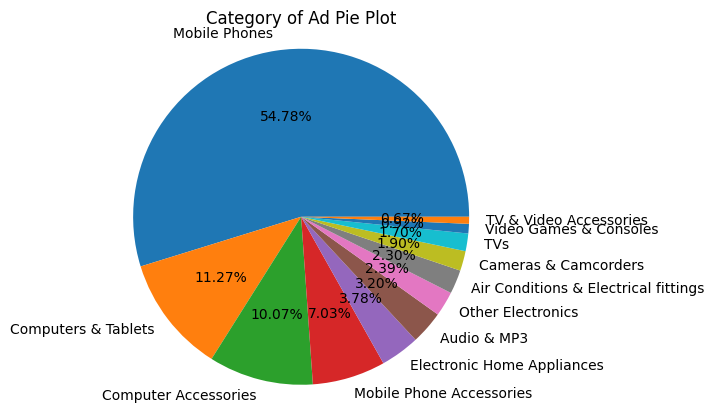

In [9]:
plt.pie(category_stats['count'], labels=category_stats['index'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('Category of Ad Pie Plot')
plt.show()

The pie chart visualizes the distribution of advertisement categories in the data. The chart is titled "Category of Ad Pie Plot". Each slice of the pie corresponds to a category, and its size reflects the proportion of advertisements in that category. The legend (outside the circle) associates colors with category names. Percentages are displayed within the pie slices, showing the contribution of each category to the whole (100%).

 "Mobile Phones" appears to be the dominant category, followed by "Computers & Tablets" and "Computer Accessories". Other categories like "TVs", "Audio & MP3", and "Other Electronics" occupy smaller slices. This visualization complements the insights from the category_stats DataFrame by offering a more intuitive view of the category distribution. It allows to easily compare category sizes and identify the most prominent categories at a glance.

In [10]:
location_stats = pd.concat([df['location'].value_counts(), df['location'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
location_stats

,index,count,percentage
0,Colombo 3,9217,5.0
1,Kandy City,8095,4.0
2,Gampaha City,7870,4.0
3,Maharagama,7765,4.0
4,Dehiwala,7144,4.0
...,...,...,...
199,Rattota,19,0.0
200,Ella,14,0.0
201,Gandara,10,0.0
202,Sigiriya,6,0.0


The DataFrame likely includes many rows (204 in your case), showcasing a large number of locations with varying advertisement counts. This analysis provides information about the geographical distribution of electronic advertisement postings. It can be useful for:
1. Identifying advertisement hotspots: Locations with high advertisement counts ("Colombo", "Kandy City") might be areas with higher demand for electronic products or a larger seller base.
2. Understanding regional trends: If your data covers a broad geographical area, you can explore advertisement distribution across regions.
3. Targeted marketing: Businesses can leverage this information to tailor marketing campaigns to specific locations with high potential customer bases.

In [11]:
membership_level_stats = pd.concat([df['membership_level'].value_counts(), df['membership_level'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
membership_level_stats

,index,count,percentage
0,free,126134,63.0
1,premium,64178,32.0
2,plus,9040,5.0


This analysis provides information about the distribution of advertisements across different membership levels on the platform where the data originates, it shows that "free" is the most common membership level, followed by "premium" and "plus".

Interpretation:
1. Platform Focus: If the platform offers benefits to premium or plus members (e.g., higher visibility for ads), the high number of "free" ads might suggest the platform caters to a broad audience or that the benefits of higher membership tiers aren't widely utilized.
2. Data Source: Consider the source of the data. If it comes from a website with a free registration option, a high number of "free" memberships might be expected.

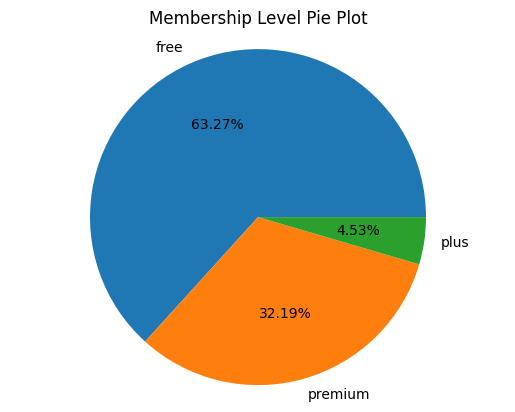

In [12]:
plt.pie(membership_level_stats['count'], labels=membership_level_stats['index'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('Membership Level Pie Plot')
plt.show()

The pie chart is titled "Membership Level Pie Plot" and shows the distribution of advertisements across different membership levels ("free", "premium", and "plus"). Each pie slice represents a membership level, and its size corresponds to the proportion of advertisements posted by users at that level. The legend associates colors with membership level names. Percentages are displayed within the pie slices, indicating the contribution of each membership level to the total (100%).

Consistent with the membership_level_stats DataFrame, the pie chart visually confirms that "free" is the dominant membership level, occupying the largest pie slice (around 63%). "Premium" memberships take up the next biggest slice (around 32%), while "plus" memberships occupy the smallest portion (around 5%). This visualization offers a complementary perspective to the numerical data in the DataFrame. It allows to easily compare the sizes of membership level categories and gain a quick understanding of their relative proportions.

In [13]:
df_noncat.describe()

,price
count,1.993520e+05
mean,7.325022e+04
std,1.006338e+05
min,1.000000e+00
25%,1.950000e+04
50%,4.250000e+04
75%,8.490000e+04
max,9.500000e+06


Statistical descriptions:
1. count- The number of non-null values in the column
2. mean- The average value in the column
3. std- The standard deviation of the values in the column
4. min- The minimum value in the column
5. 25%- The first quartile (25th percentile) of the values in the column
6. 50%- The second quartile (50th percentile) or median of the values in the column
7. 75%- The third quartile (75th percentile) of the values in the column
8. max- The maximum value in the column

The table shows that the average price is around 9150, with a standard deviation of 7909. The minimum price is 1000 and the maximum price is 25000. The median price is 7500, indicating that half of the prices fall below 7500 and the other half fall above 7500.

Mean of Speed is = 73250.22
St. Dev. of Price is = 100633.51


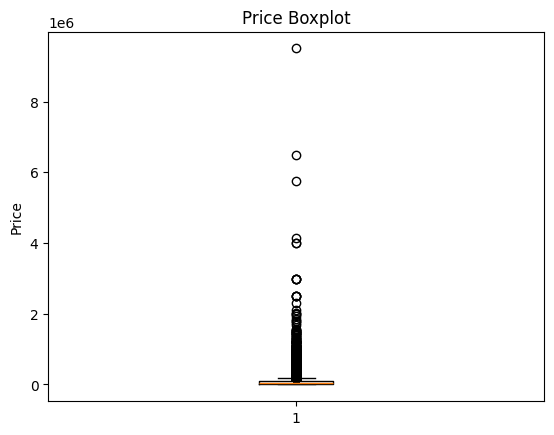

In [14]:
# Mean (Price)
price_mean = round(np.mean(df_noncat.price), 2)
print("Mean of Speed is =", price_mean)
# Std. Dev. (mpg)
price_sd = round(np.std(df_noncat.price), 2)
print("St. Dev. of Price is =", price_sd)

plt.boxplot(df_noncat['price'])
plt.ylabel('Price')
plt.title('Price Boxplot')
plt.show()

The boxplot summarizes the distribution of prices with the following elements:
1. Center Line: The horizontal line in the middle of the box represents the median price (50th percentile), dividing the data into two halves with an equal number of advertisements above and below this value.
2. Box: The box represents the interquartile range (IQR), which covers the middle 50% of the data. The box extends from the first quartile (Q1, 25th percentile) to the third quartile (Q3, 75th percentile).
3. Whiskers: The lines extending from the box (whiskers) represent the remaining data points that fall within 1.5 IQRs from the quartiles. Data points beyond these whiskers are considered outliers and are plotted as individual circles.

The calculated mean price is around 73,250 with a standard deviation of 100,633. This suggests a high average price with a large spread in the data. The boxplot confirms this visually. The box itself is relatively narrow, indicating that the middle 50% of the data points are clustered together. However, the long whiskers on the right side show that there are a significant number of advertisements with prices much higher than the third quartile (75th percentile). The presence of a few outliers is also visible.

Some key takeaways from this analysis:
1. A significant portion of the advertisements might be for high-end electronic products.
2. The large standard deviation suggests a high variation in prices.
3. There might be outliers representing exceptionally expensive products.

# 4. DATA PRE-PROCESSING

**Missing Data Information**

In [15]:
df.info() # Dataframe Information (Provide Information on Missing Data)
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199352 entries, 0 to 199999
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ad_title              199352 non-null  object        
 1   title                 199352 non-null  object        
 2   type                  199352 non-null  object        
 3   price                 199352 non-null  float64       
 4   posted_date           199348 non-null  object        
 5   deactivation_date     199348 non-null  object        
 6   category              199352 non-null  object        
 7   parent_category       199352 non-null  object        
 8   location              199352 non-null  object        
 9   geo_region            199352 non-null  object        
 10  area                  199352 non-null  object        
 11  is_delivery_free      199352 non-null  bool          
 12  is_doorstep_delivery  199352 non-null  bool          
 13 

11238     4
147837    4
10575     4
147863    4
150757    4
dtype: int64

This section highlights the specific columns with missing data and their corresponding counts. For instance, it shows that "posted_date" and "deactivation_date" have 4 missing values each. It displays the row index and the total number of missing values in each of those rows. There seems to be a pattern, with rows 11238, 147837, 10575, 147863, and 150757 having 4 missing values each.

The analysis reveals that there's a minimal amount of missing data in the dataset (less than 1% for most columns). However, there are a few points to consider:
1. Specific Columns: The "posted_date", "deactivation_date", "is_member", and "member_since" columns have missing values. You'll need to decide how to handle these missing values (e.g., remove rows, impute values) depending on your analysis goals.
2. Records with Missing Values: The top 5 rows with the most missing data might require further investigation. Are these missing values random, or is there a pattern? Are these specific records important for your analysis?

**Missing Data Treatment**

In [16]:
from sklearn.impute import SimpleImputer
# Dataset Used : df_cat
df_cat = df[['membership_level', 'category', 'type', 'location']]
si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Strategy = median [When Odd Number of Categories Exists]
si_cat_fit = si_cat.fit_transform(df_cat)
df_cat_mdi = pd.DataFrame(si_cat_fit, columns=df_cat.columns); df_cat_mdi # Missing Categorical Data Imputed Subset
df_cat_mdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199352 entries, 0 to 199351
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   membership_level  199352 non-null  object
 1   category          199352 non-null  object
 2   type              199352 non-null  object
 3   location          199352 non-null  object
dtypes: object(4)
memory usage: 6.1+ MB


The output shows information about the DataFrame df_cat_mdi, which contains the imputed data for the categorical columns. Here are the key points:
1. No Missing Values: The .info() output confirms that there are no missing values ("Non-Null Count" is 2 for all columns). This indicates that the imputation process successfully replaced any missing values with the most frequent category in each column.
2. Data Types: All columns are of type "object", which is consistent with categorical data.
3. Memory Usage: The memory usage is slightly lower compared to the original DataFrame (df_cat) as there's no need to store information about missing values anymore.

This code snippet demonstrates how to handle missing values in categorical data using the SimpleImputer class with the "most_frequent" strategy. This is a common approach, but it's important to consider its limitations:
1. Loss of Information: Replacing missing values with the most frequent category can introduce bias, especially if the missing values are not randomly distributed.
2. Not Ideal for All Cases: This strategy might not be suitable if there's a high number of missing values or if the most frequent category doesn't accurately represent the missing data.

In [17]:
# Dataset Used : df_noncat
si_noncat = SimpleImputer(missing_values=np.nan, strategy='mean') # Other Strategy : mean | median | most_frequent | constant
si_noncat_fit = si_noncat.fit_transform(df_noncat)
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat.columns); df_noncat_mdi_si # Missing Non-Categorical Data Imputed Subset using Simple Imputer
df_noncat_mdi_si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199352 entries, 0 to 199351
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   price   199352 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [18]:
from sklearn.impute import KNNImputer
ki = KNNImputer(n_neighbors=5, weights='uniform') # weights : uniform | distance | {User Defined}
ki_fit = ki.fit_transform(df_noncat)
df_noncat_mdi_ki = pd.DataFrame(ki_fit, columns=df_noncat.columns); df_noncat_mdi_ki # Missing Non-Categorical Data Imputed Subset using KNN Imputer
df_noncat_mdi_ki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199352 entries, 0 to 199351
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   price   199352 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


KNN Imputation:
1. It imputes missing values by finding K-nearest neighbors (based on similarity) and using their values to predict missing ones.
2. It often captures relationships between features better than simpler imputation methods.

Considerations:
1. Number of Neighbors: Experiment with n_neighbors for optimal results. Too few might be sensitive to outliers, while too many might oversmooth the data.
2. Weights: Explore different weighting schemes: - uniform: Equally weights neighbors. - distance: Weights neighbors inversely proportional to their distance. - User-defined functions can be used for custom weighting.
3. Computational Efficiency: KNN imputation can be computationally expensive for large datasets.

**Missing Data Exclusion**

In [19]:
# Dataset Used : df_cat_mdi | df_noncat_mdi_si | df_noncat_mdi_ki

# Excluding Empty Records (If Any)
df_cat_mdi.dropna(axis=0, how='all', inplace=True) # Categorical Data Subset
df_noncat_mdi_si.dropna(axis=0, how='all', inplace=True) # Non-Categorical Data Subset
#df_noncat_mdi_ki.dropna(axis=0, how='all', inplace=True) # Non-Categorical Data Subset

# Excluding Empty Variables (If Any)
df_cat_mdi.dropna(axis=1, how='all', inplace=True) # Categorical Data Subset
df_noncat_mdi_si.dropna(axis=1, how='all', inplace=True) # Non-Categorical Data Subset
#df_noncat_mdi_ki.dropna(axis=1, how='all', inplace=True) # Non-Categorical Data Subset

df_cat_mdt = df_cat_mdi.copy() # Missing Categorical Treated Dataset
df_noncat_mdt = df_noncat_mdi_si.copy() # Missing Non-Categorical Treated Dataset
#df_noncat_mdt = df_noncat_mdi_ki.copy() # Missing Non-Categorical Treated Dataset

Overall Process:
1. We're checking for and potentially removing rows or columns with only missing values in the imputed categorical (df_cat_mdi) and non-categorical data subsets (df_noncat_mdi_si and potentially df_noncat_mdi_ki).
2. We're creating copies of the potentially cleaned DataFrames (df_cat_mdt and df_noncat_mdt).

**Numeric Encoding of Data**

In [20]:
from sklearn.preprocessing import OrdinalEncoder
# Dataset Used : df_cat_mdt
df_cat_mdt_code = df_cat_mdt.copy()

# Using Scikit Learn : Ordinal Encoder (Superior)
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat_mdt_code)
df_cat_code_oe = pd.DataFrame(oe_fit, columns=['membership_level', 'category', 'type', 'location']); df_cat_code_oe
df_cat_mdt_code_oe = df_cat_mdt_code.join(df_cat_code_oe, rsuffix='_oe'); df_cat_mdt_code_oe # (Missing Data Treated) Numeric Coded Categorical Dataset using Scikit Learn Ordinal Encoder
#df_cat_mdt_code_oe = pd.merge(df_cat_mdt_code, df_cat_code_oe, left_index=True, right_index=True); df_cat_mdt_code_oe

,membership_level,category,type,location,membership_level_oe,category_oe,type_oe,location_oe
0,premium,TV & Video Accessories,for_sale,Colombo 11,2.0,9.0,0.0,34.0
1,plus,Other Electronics,for_sale,Nugegoda,1.0,8.0,0.0,157.0
2,premium,Computer Accessories,for_sale,Monaragala City,2.0,3.0,0.0,144.0
3,premium,Air Conditions & Electrical fittings,for_sale,Colombo 11,2.0,0.0,0.0,34.0
4,premium,Other Electronics,for_sale,Colombo 11,2.0,8.0,0.0,34.0
...,...,...,...,...,...,...,...,...
199347,premium,Mobile Phones,for_sale,Panadura,2.0,7.0,0.0,162.0
199348,premium,Computers & Tablets,for_sale,Peradeniya,2.0,4.0,0.0,167.0
199349,free,Mobile Phones,for_sale,Nittambuwa,0.0,7.0,0.0,155.0
199350,plus,Electronic Home Appliances,for_sale,Kiribathgoda,1.0,5.0,0.0,115.0


The output visualizes a DataFrame with original categorical columns and their corresponding encoded columns:
Columns like 'membership_level', 'category', 'type', and 'location' now have numerically coded versions with suffixes like '_oe'.
1. Ordinal Encoding: Assigns numerical codes to categories, preserving their order. It's useful for machine learning algorithms that require numerical input but can be sensitive to ordinal relationships.
2. Limitations: Ordinal encoding assumes a meaningful order exists between categories. If there's no natural order, consider alternative encoding techniques (e.g., one-hot encoding).
3. Data Augmentation: The code preserves original categorical columns while adding encoded ones. This allows flexibility in analysis and model building.

**Data Transformation & Rescaling (Treatment of Outliers)**

In [21]:
# Dataset Used : df_noncat_mdt
#Normalization : Min-Max Scaling

mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_noncat_mdt[['price']])
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=['price_mmnorm']); df_noncat_minmax_norm
#df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=df_noncat_mdt.columns+'_mmnorm'); df_noncat_minmax_norm
df_noncat_mdt_mmn = df_noncat_mdt.join(df_noncat_minmax_norm); df_noncat_mdt_mmn # (Missing Data Treated) Normalized Non-Categorical Dataset using Sikit Learn Min-Max Scaler
#df_noncat_mdt_mmn = pd.merge(df_noncat_mdt, df_noncat_minmax_norm, left_index=True, right_index=True); df_noncat_mdt_mmn

,price,price_mmnorm
0,13000.0,0.001368
1,18000.0,0.001895
2,16499.0,0.001737
3,9500.0,0.001000
4,24500.0,0.002579
...,...,...
199347,26990.0,0.002841
199348,59000.0,0.006210
199349,18500.0,0.001947
199350,599000.0,0.063053


This new column contains the normalized values of the original price column, scaled between 0 and 1 using min-max scaling.

Key Points about Min-Max Scaling:
1. Normalization: It scales numerical features to a common range (usually between 0 and 1). This can be helpful for machine learning algorithms that are sensitive to the scale of features.
2. MinMaxScaler: It's a popular choice for normalization because it's simple to implement and interpret.
3. Limitations: It can be sensitive to outliers, which can significantly affect the scaling range. Consider winsorization or robust scaling techniques if outliers are a concern.

**Pre-Processed Dataset**

In [22]:
# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_mdt_code_oe.copy(); df_cat_ppd # Preferred Data Subset
#df_cat_ppd = df_cat_mdt_code_pd.copy(); df_cat_ppd
#df_cat_ppd = df_cat_mdt_code_le.copy(); df_cat_ppd

,membership_level,category,type,location,membership_level_oe,category_oe,type_oe,location_oe
0,premium,TV & Video Accessories,for_sale,Colombo 11,2.0,9.0,0.0,34.0
1,plus,Other Electronics,for_sale,Nugegoda,1.0,8.0,0.0,157.0
2,premium,Computer Accessories,for_sale,Monaragala City,2.0,3.0,0.0,144.0
3,premium,Air Conditions & Electrical fittings,for_sale,Colombo 11,2.0,0.0,0.0,34.0
4,premium,Other Electronics,for_sale,Colombo 11,2.0,8.0,0.0,34.0
...,...,...,...,...,...,...,...,...
199347,premium,Mobile Phones,for_sale,Panadura,2.0,7.0,0.0,162.0
199348,premium,Computers & Tablets,for_sale,Peradeniya,2.0,4.0,0.0,167.0
199349,free,Mobile Phones,for_sale,Nittambuwa,0.0,7.0,0.0,155.0
199350,plus,Electronic Home Appliances,for_sale,Kiribathgoda,1.0,5.0,0.0,115.0


The code is part of a larger data pre-processing pipeline that appears to involve:
1. Handling missing values: You might have used techniques like SimpleImputer or KNNImputer to address missing values in the categorical data.
2. Ordinal Encoding: You've used OrdinalEncoder to convert categorical columns (membership_level, category, type, and location) into numerical representations (membership_level_oe, category_oe, type_oe, and location_oe).

In [23]:
# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_mdt_mmn.copy(); df_noncat_ppd # Preferred Data Subset
#df_noncat_ppd = df_noncat_mdt_rn.copy(); df_noncat_ppd
#df_noncat_ppd = df_noncat_mdt_std.copy(); df_noncat_ppd
#df_noncat_ppd = df_noncat_mdt_lt.copy(); df_noncat_ppd

,price,price_mmnorm
0,13000.0,0.001368
1,18000.0,0.001895
2,16499.0,0.001737
3,9500.0,0.001000
4,24500.0,0.002579
...,...,...
199347,26990.0,0.002841
199348,59000.0,0.006210
199349,18500.0,0.001947
199350,599000.0,0.063053


We are creating separate DataFrames (df_cat_ppd and df_noncat_ppd) for pre-processed categorical and non-categorical data. In future steps, we might want to combine these DataFrames into a single DataFrame for training machine learning models that can handle both categorical and numerical features.

Considerations:
1. Normalization Choice: Min-max scaling is a common choice, but there are other scaling techniques like standardization (z-score normalization). Consider your data and modeling goals when choosing a normalization technique.
2. Explore df_noncat_ppd: Examine the distribution of the normalized features to understand the data landscape before using it for modeling.

In [24]:
# Pre-Processed Dataset
df_ppd = df_cat_ppd.join(df_noncat_ppd); df_ppd # Pre-Processed Dataset
#df_ppd = pd.merge(df_cat_ppd, df_noncat_ppd, left_index=True, right_index=True); df_ppd

,membership_level,category,type,location,membership_level_oe,category_oe,type_oe,location_oe,price,price_mmnorm
0,premium,TV & Video Accessories,for_sale,Colombo 11,2.0,9.0,0.0,34.0,13000.0,0.001368
1,plus,Other Electronics,for_sale,Nugegoda,1.0,8.0,0.0,157.0,18000.0,0.001895
2,premium,Computer Accessories,for_sale,Monaragala City,2.0,3.0,0.0,144.0,16499.0,0.001737
3,premium,Air Conditions & Electrical fittings,for_sale,Colombo 11,2.0,0.0,0.0,34.0,9500.0,0.001000
4,premium,Other Electronics,for_sale,Colombo 11,2.0,8.0,0.0,34.0,24500.0,0.002579
...,...,...,...,...,...,...,...,...,...,...
199347,premium,Mobile Phones,for_sale,Panadura,2.0,7.0,0.0,162.0,26990.0,0.002841
199348,premium,Computers & Tablets,for_sale,Peradeniya,2.0,4.0,0.0,167.0,59000.0,0.006210
199349,free,Mobile Phones,for_sale,Nittambuwa,0.0,7.0,0.0,155.0,18500.0,0.001947
199350,plus,Electronic Home Appliances,for_sale,Kiribathgoda,1.0,5.0,0.0,115.0,599000.0,0.063053


Takeaways:
1. Pre-Processed Dataset: df_ppd now contains all pre-processed numerical and categorical features, ready for further analysis or modeling.
2. Handling Missing Values and Categorical Encoding: It's assumed that you've already addressed missing values and encoded categorical features in previous steps.
3. Normalization: The numerical feature price has been normalized using min-max scaling.
4. Flexibility for Analysis: You have both original and pre-processed versions of features, allowing for flexibility in analysis or model building.

# 5. DATA ANALYSIS

In [25]:
# Required Libraries
from pydataset import data # For Datasets
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation

In [26]:
# Subset dataset based on category & price
df_ppd_subset = df_ppd[['membership_level_oe','category_oe','type_oe','location_oe','price_mmnorm']]; df_ppd_subset

,membership_level_oe,category_oe,type_oe,location_oe,price_mmnorm
0,2.0,9.0,0.0,34.0,0.001368
1,1.0,8.0,0.0,157.0,0.001895
2,2.0,3.0,0.0,144.0,0.001737
3,2.0,0.0,0.0,34.0,0.001000
4,2.0,8.0,0.0,34.0,0.002579
...,...,...,...,...,...
199347,2.0,7.0,0.0,162.0,0.002841
199348,2.0,4.0,0.0,167.0,0.006210
199349,0.0,7.0,0.0,155.0,0.001947
199350,1.0,5.0,0.0,115.0,0.063053


membership_level_oe    0
category_oe            0
type_oe                0
location_oe            0
price_mmnorm           0
dtype: int64
membership_level_oe    float64
category_oe            float64
type_oe                float64
location_oe            float64
price_mmnorm           float64
dtype: object


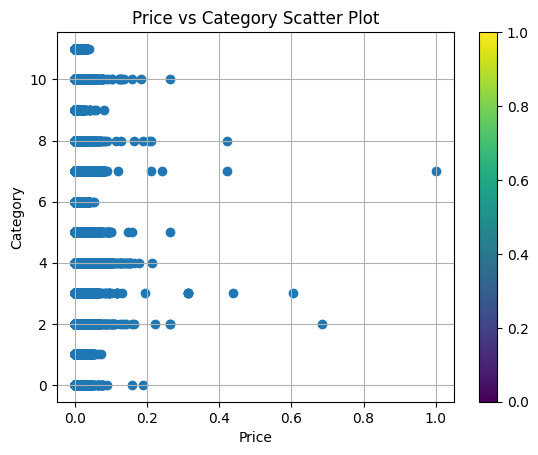

In [27]:
# Check for missing values
missing_values = df_ppd_subset.isnull().sum()
print(missing_values)

# Check data types
print(df_ppd_subset.dtypes)

# Plot df_ppd_subset Data if there are no missing values and correct data types
if missing_values['price_mmnorm'] == 0 and missing_values['category_oe'] == 0:
    if df_ppd_subset['price_mmnorm'].dtype in ['float64', 'int64'] and df_ppd_subset['category_oe'].dtype in ['float64', 'int64']:
        # Plot scatter plot
        plt.scatter(x='price_mmnorm', y='category_oe', data=df_ppd_subset)
        plt.xlabel('Price')
        plt.ylabel('Category')
        plt.title('Price vs Category Scatter Plot')
        plt.colorbar()
        plt.grid()
        plt.show()
    else:
        print("Data types of 'price_mnorm' and 'category_oe' columns should be numeric.")
else:
    print("Missing values found in 'price_mnorm' or 'category_oe' columns.")

There are no missing values in the 'price_mmnorm' (normalized price) and 'category_oe' (ordinal encoded category) columns of your DataFrame df_ppd_subset, and the data types are also correct (float64). This means the code likely proceeded to create a scatter plot to visualize the relationship between these two features. Here's an analysis of the scatter plot in the image, considering the context of your data (assuming it depicts price of some product and its category):

The scatter plot shows a trend between a product's normalized price and its category. Each dot represents a product. The x-axis indicates the normalized price (0 to 1), and the y-axis indicates the product's category (encoded value). There seems to be some spread in price within most categories, but there might also be some clustering, suggesting similar prices for certain categories. It's difficult to say definitively without seeing the colorbar (if present). The colorbar could reveal price distribution within categories. For example, some categories might have a wider range of normalized prices compared to others. Overall, this scatter plot helps us explore how price and product category are related in this dataset.

Key points:
1. No missing values in 'price_mmnorm' and 'category_oe' columns.
2. Data types are float64 for both columns (suitable for plotting).
3. Scatter plot visualizes the relationship between normalized price and product category.
4. Spread in price suggests some variation within categories.
5. Colorbar (if present) might reveal price distribution within categories.

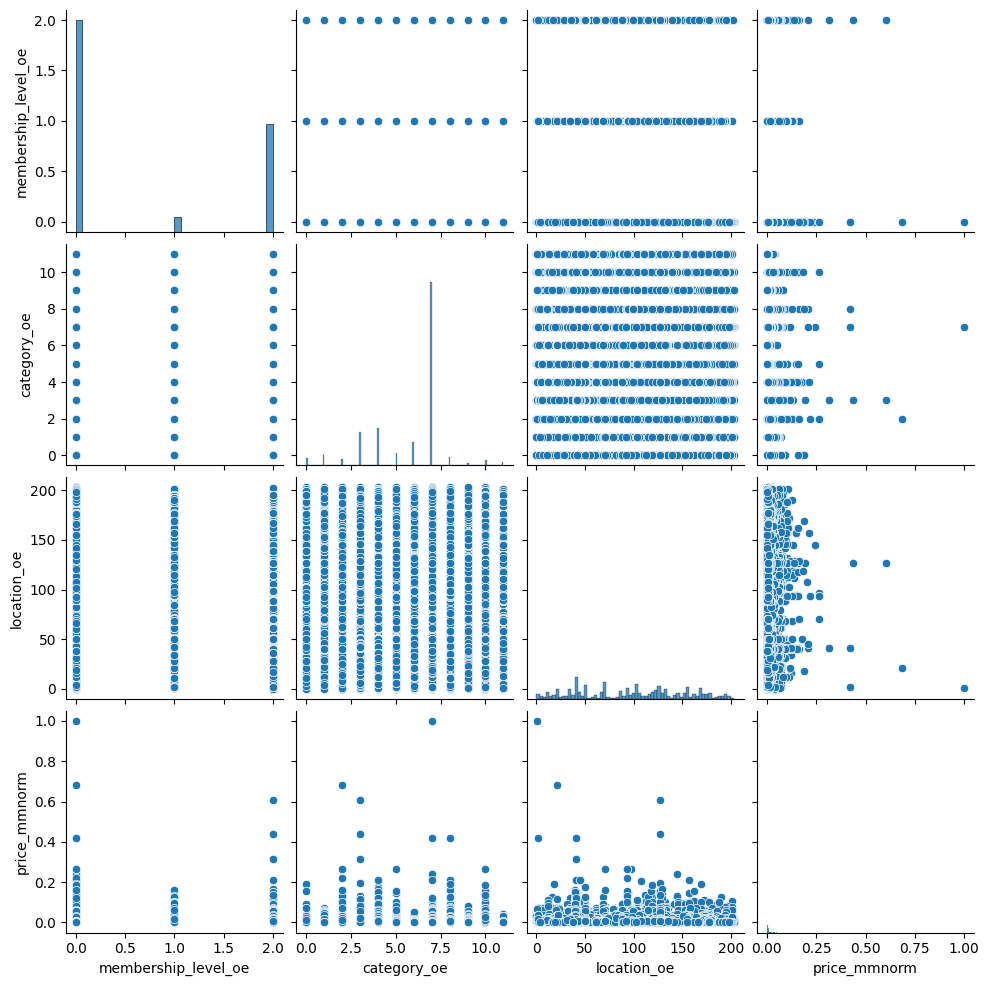

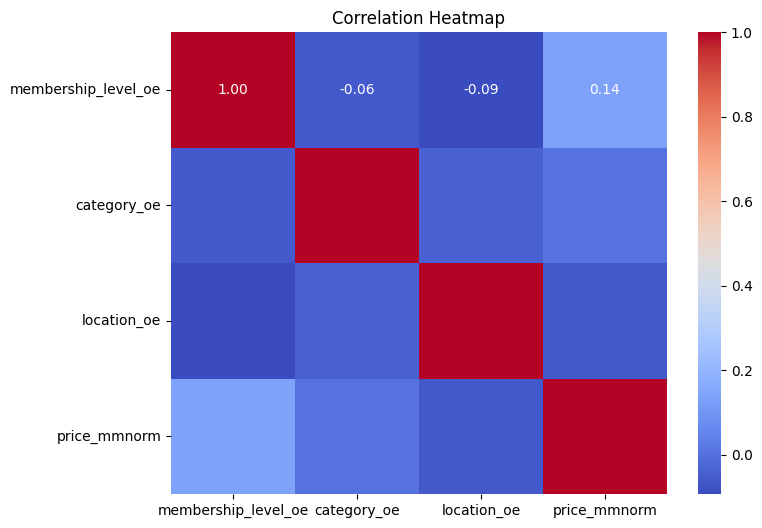

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical variables for visualization
selected_columns = ['membership_level_oe','category_oe','location_oe','price_mmnorm']
numerical_data = df_ppd[selected_columns]

# Pairplot to visualize relationships between numerical variables
sns.pairplot(numerical_data)
plt.show()

# Heatmap to visualize correlations between numerical variables
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Analyzing the visualizations, we can explore relationships between features like membership level, category, location, and normalized price. The pairplot likely reveals trends or patterns in these relationships. For example, are higher membership levels associated with specific price ranges? Do certain categories tend to have similar locations? The heatmap complements this by showing correlation strengths. Strong positive or negative values indicate how changes in one variable might be linked to changes in another. These visualizations can help identify potentially influential features for further analysis or modeling in this dataset.

The heatmap likely visualizes correlations between numerical features like membership level (encoded), category (encoded), location (encoded), and normalized price. Dark red squares indicate strong positive correlations, while dark blue squares indicate strong negative correlations. Values closer to 0 suggest weaker correlations. Examining the heatmap, we can identify which features have the strongest relationships. For instance, a dark red square between price and membership level might suggest higher prices are associated with certain membership levels. This heatmap can guide further analysis by highlighting potentially influential features for tasks like modeling or prediction in this dataset.

**K-Means Clustering**

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\clust

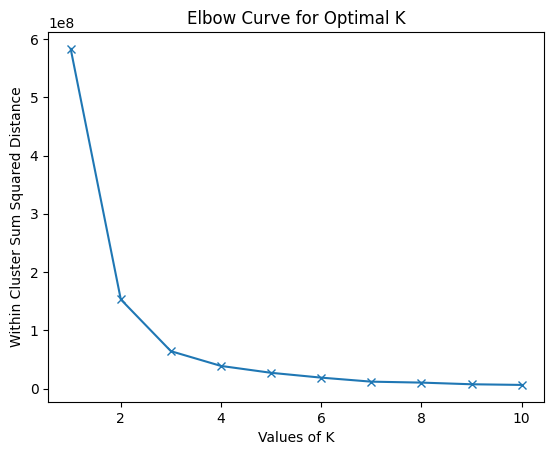

In [29]:
# Now proceed with clustering
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1, 11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111)
    kmeans.fit(df_ppd_subset)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()

The elbow curve plots the "Within Cluster Sum of Squared Distances" (WCSS) for different numbers of clusters (k). The WCSS indicates how tightly data points are grouped within their assigned clusters. A lower WCSS generally suggests better clustering.

By observing the curve, we can estimate the optimal number of clusters (k) where the WCSS starts to flatten out significantly. In this image, the elbow seems to be around k=3. This suggests that using 3 clusters might create a good balance between minimizing WCSS (tight clusters) and avoiding overfitting the data (too many clusters).

It's important to consider other factors like domain knowledge and interpreting the clusters themselves for final validation. But based on the elbow curve, k=3 seems like a reasonable starting point for k-means clustering on this dataset.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'df_ppd_subset' is your DataFrame containing the data

# Perform clustering
km_2cluster = KMeans(n_clusters=2, init='random', random_state=222)
km_2cluster_model = km_2cluster.fit_predict(df_ppd_subset)

km_3cluster = KMeans(n_clusters=3, init='random', random_state=333)
km_3cluster_model = km_3cluster.fit_predict(df_ppd_subset)

km_4cluster = KMeans(n_clusters=4, init='random', random_state=444)
km_4cluster_model = km_4cluster.fit_predict(df_ppd_subset)

km_5cluster = KMeans(n_clusters=5, init='random', random_state=555)
km_5cluster_model = km_5cluster.fit_predict(df_ppd_subset)

print(km_2cluster_model)
print(km_3cluster_model)
print(km_4cluster_model)
print(km_5cluster_model)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 1 ... 1 1 1]
[2 1 1 ... 1 0 1]
[2 3 1 ... 3 1 3]
[0 4 3 ... 4 3 4]


The code performs k-means clustering on your data (df_ppd_subset) using four different numbers of clusters (2, 3, 4, and 5). It creates separate models for each cluster number (km_2cluster, km_3cluster, etc.). The output shows the predicted cluster labels for each data point in df_ppd_subset. 

This output itself doesn't provide insights into the clustering quality. You'll need visualizations (e.g., scatter plots with cluster coloring) to analyze how well data points are grouped within each cluster and how distinct the clusters are. By evaluating these visualizations, you can determine the most suitable number of clusters for your analysis.

In [40]:
from scipy.stats import chi2_contingency

# Assuming cluster labels are stored in 'Cluster' column
categorical_features = ['membership_level_oe']  # Replace with your features

# Iterate over each unique cluster
for cluster_label in df_ppd_subset['Cluster'].unique():
  # Subset the dataframe for the current cluster
  cluster_subset = df_ppd_subset[df_ppd_subset['Cluster'] == cluster_label]

  # Create contingency tables for each categorical feature
  contingency_tables = {}
  for feature in categorical_features:
    contingency_table = pd.crosstab(cluster_subset[feature], df_ppd_subset['Cluster'])  # Include all clusters in contingency table
    contingency_tables[feature] = contingency_table

  # Perform Chi-Square test of independence for each feature
  for feature, contingency_table in contingency_tables.items():
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Cluster {cluster_label}: Chi-Square test for {feature}: p-value = {p}")

Cluster 0: Chi-Square test for membership_level_oe: p-value = 1.0
Cluster 4: Chi-Square test for membership_level_oe: p-value = 1.0
Cluster 3: Chi-Square test for membership_level_oe: p-value = 1.0
Cluster 2: Chi-Square test for membership_level_oe: p-value = 1.0
Cluster 1: Chi-Square test for membership_level_oe: p-value = 1.0


In [38]:
from scipy.stats import f_oneway

# Define a list of numerical features (replace 'price' with relevant features from your data)
numerical_features = ['price_mmnorm']  # Assuming price was normalized

# Initialize a dictionary to store data for each cluster
cluster_data = {}

# Iterate over each unique cluster label
for cluster_label in df_ppd_subset['Cluster'].unique():
  # Subset the dataframe for the current cluster
  cluster_subset = df_ppd_subset[df_ppd_subset['Cluster'] == cluster_label]

  # Store numerical data for the current cluster (modify if needed)
  cluster_data[cluster_label] = {}
  for feature in numerical_features:
    cluster_data[cluster_label][feature] = cluster_subset[feature]

# Perform ANOVA for each numerical feature
for feature in numerical_features:
  # Extract data from each cluster
  data = [cluster_data[cluster_label][feature] for cluster_label in cluster_data.keys()]
  f_statistic, p_value = f_oneway(*data)
  print(f"ANOVA for {feature}: F-statistic = {f_statistic}, p-value = {p_value}")

ANOVA for price_mmnorm: F-statistic = 292.63245309368983, p-value = 2.1457039816517803e-251


In [32]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate silhouette score for 2-cluster model
sscore_km_2cluster = silhouette_score(df_ppd_subset, km_2cluster_model)
print("Silhouette Score for 2-cluster model:", sscore_km_2cluster)

# Calculate Davies-Bouldin score for 2-cluster model
dbscore_km_2cluster = davies_bouldin_score(df_ppd_subset, km_2cluster_model)
print("Davies-Bouldin Score for 2-cluster model:", dbscore_km_2cluster)

# Calculate silhouette score for 3-cluster model
sscore_km_3cluster = silhouette_score(df_ppd_subset, km_3cluster_model)
print("Silhouette Score for 3-cluster model:", sscore_km_3cluster)

# Calculate Davies-Bouldin score for 3-cluster model
dbscore_km_3cluster = davies_bouldin_score(df_ppd_subset, km_3cluster_model)
print("Davies-Bouldin Score for 3-cluster model:", dbscore_km_3cluster)

# Calculate silhouette score for 4-cluster model
sscore_km_4cluster = silhouette_score(df_ppd_subset, km_4cluster_model)
print("Silhouette Score for 4-cluster model:", sscore_km_4cluster)

# Calculate Davies-Bouldin score for 4-cluster model
dbscore_km_4cluster = davies_bouldin_score(df_ppd_subset, km_4cluster_model)
print("Davies-Bouldin Score for 4-cluster model:", dbscore_km_3cluster)

# Calculate silhouette score for 5-cluster model
sscore_km_5cluster = silhouette_score(df_ppd_subset, km_5cluster_model)
print("Silhouette Score for 5-cluster model:", sscore_km_5cluster)

# Calculate Davies-Bouldin score for 5-cluster model
dbscore_km_5cluster = davies_bouldin_score(df_ppd_subset, km_5cluster_model)
print("Davies-Bouldin Score for 5-cluster model:", dbscore_km_5cluster)

Silhouette Score for 2-cluster model: 0.6154156323793875
Davies-Bouldin Score for 2-cluster model: 0.509133152897243
Silhouette Score for 3-cluster model: 0.6181330632296776
Davies-Bouldin Score for 3-cluster model: 0.47889674101300805
Silhouette Score for 4-cluster model: 0.5813239117705502
Davies-Bouldin Score for 4-cluster model: 0.47889674101300805
Silhouette Score for 5-cluster model: 0.5510873878437194
Davies-Bouldin Score for 5-cluster model: 0.5478143057062358


The code calculates silhouette and Davies-Bouldin scores to evaluate the quality of k-means clustering models with 2, 3, 4, and 5 clusters. Both scores assess how well data points are grouped within their assigned clusters and how distinct the clusters are.

Silhouette Score: Higher values indicate better clustering (closer to 1). Scores for 2, 3, and 4 clusters are relatively similar (around 0.6), suggesting potentially reasonable cluster formations in these models. The 5-cluster model has a lower score (0.55), which might indicate poorer separation between clusters.

Davies-Bouldin Score: Lower values indicate better clustering. All models have scores below 1, suggesting some level of cluster separation. The 3-cluster model has the lowest score (0.47), followed by the 4-cluster model (same score). These might be the initial models to explore further based on this metric.

While these scores provide some guidance, it's important to consider the visualizations (scatter plots with cluster coloring) to confirm cluster separation and interpretability in the context of your data and analysis goals. You might also experiment with different distance metrics or initialization methods for k-means to potentially improve clustering results.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


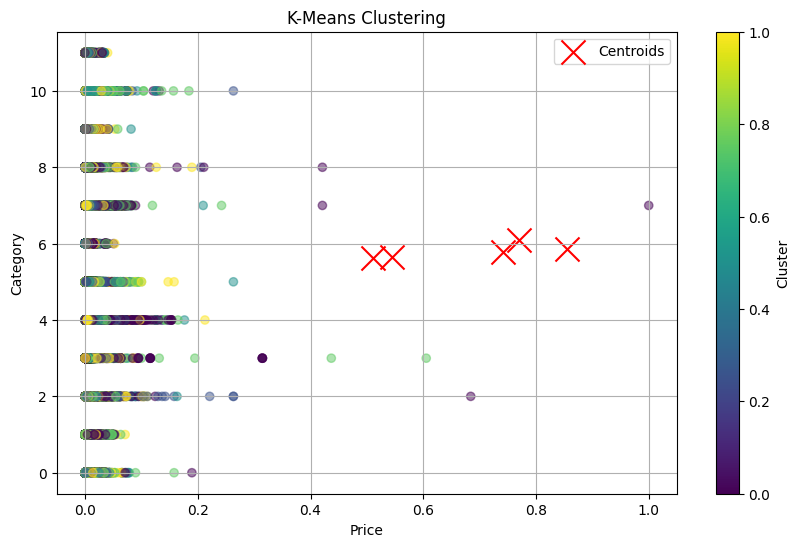

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming df_ppd_subset is your DataFrame containing the data

# Perform clustering
km_5cluster = KMeans(n_clusters=5, init='random', random_state=555)
km_5cluster_model = km_5cluster.fit(df_ppd_subset)

# Get cluster labels and centroids
cluster_labels = km_5cluster.labels_
centroids = km_5cluster.cluster_centers_

# Plot clustered data points
plt.figure(figsize=(10, 6))
plt.scatter(x=df_ppd_subset['price_mmnorm'], y=df_ppd_subset['category_oe'], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=300, c='red', label='Centroids')
plt.xlabel('Price')
plt.ylabel('Category')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()

The code performs k-means clustering on your data (df_ppd_subset) with 5 clusters. The provided image depicts the clustering results. Data points are colored based on their assigned cluster (0-4) in a scatter plot with price (normalized) on the x-axis and category (encoded) on the y-axis. Red 'x' symbols represent cluster centroids. While there's some separation between clusters, particularly green (cluster 1) and blue (cluster 3), there's also overlap in the center and upper left areas. This suggests some data points might be difficult to definitively classify. This aligns with the silhouette score of 0.551 (provided earlier), indicating a moderate clustering quality. Depending on your analysis goals, exploring a different number of clusters or adjusting k-means hyperparameters could be considered for potentially better separation.

K-means clustering result, where data points are scattered based on two features (possibly price and category). Each data point is colored based on its assigned cluster (likely 0 to 4) using a colormap. Red 'x' markers represent the centroids (cluster centers) for each cluster. While there might be some separation between clusters (especially distinct colors), there could also be overlap in some regions. This overlap suggests that some data points might be difficult to classify definitively into a single cluster. To assess clustering quality, silhouette scores (provided earlier) would be helpful. Scores closer to 1 indicate better separation.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jasleen Kaur\AppData\Local\Temp\ipykernel_12088\1622686418.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ppd_subset['Cluster'] = cluster_labels


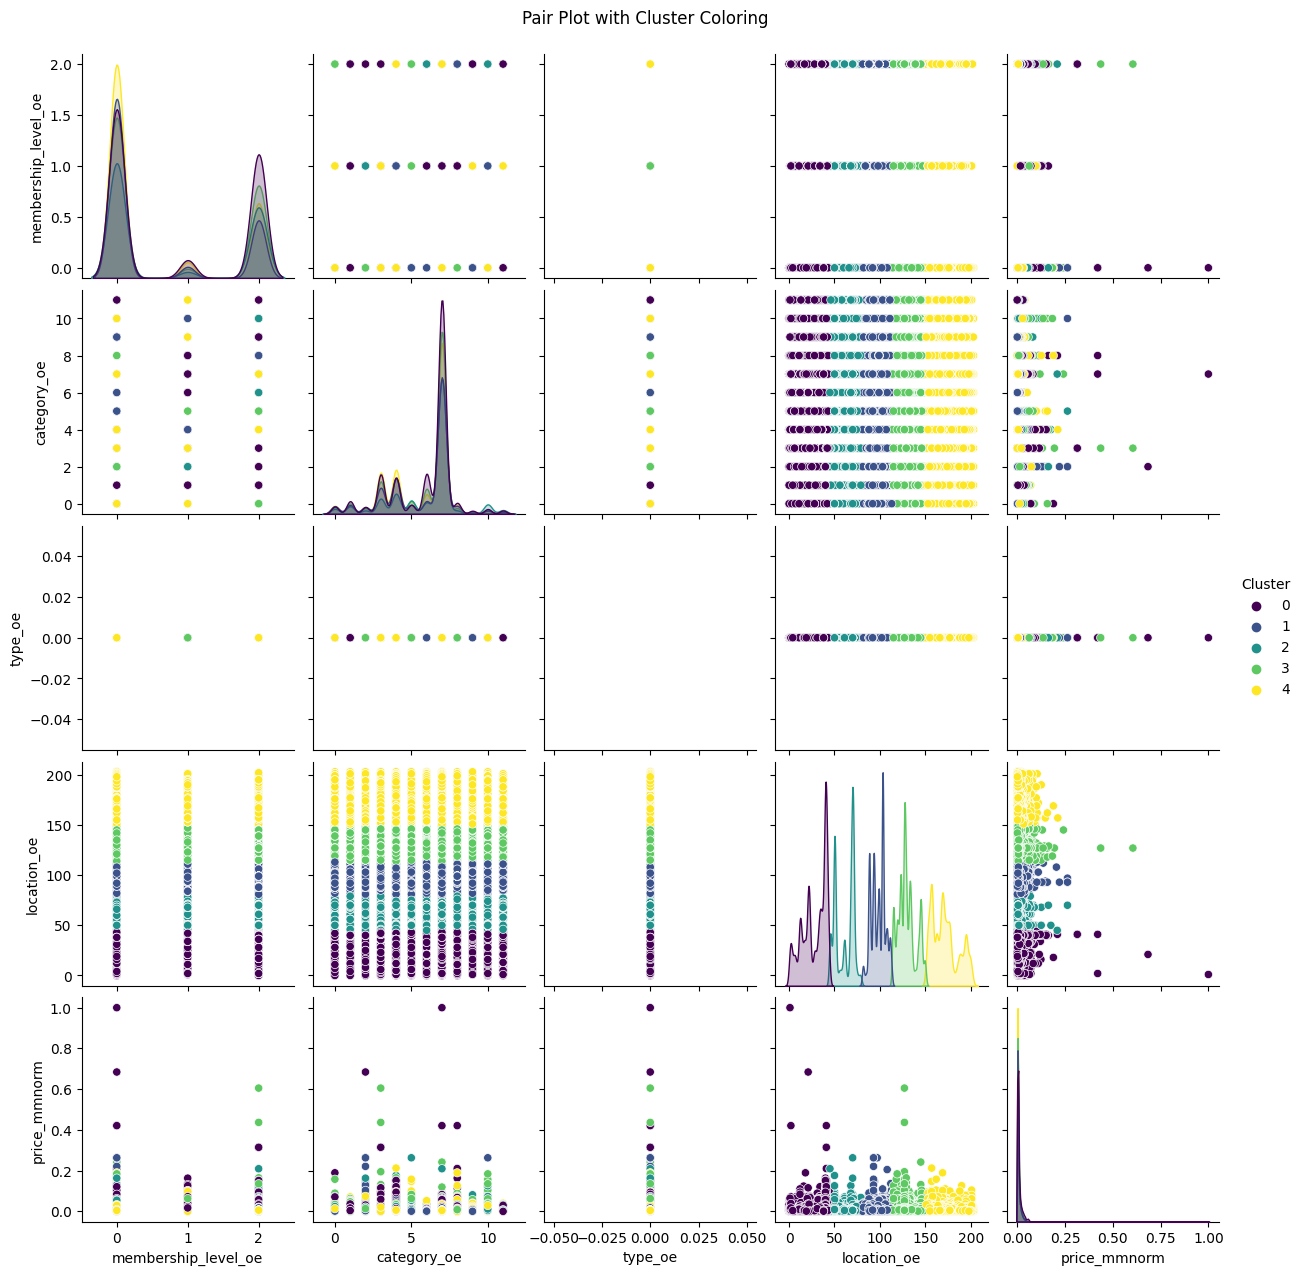

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming df_ppd_subset is your DataFrame containing the data

# Perform clustering
num_clusters = 5
km_model = KMeans(n_clusters=num_clusters, init='random', random_state=555)
cluster_labels = km_model.fit_predict(df_ppd_subset)

# Add cluster labels to the DataFrame
df_ppd_subset['Cluster'] = cluster_labels

# Create a pair plot with cluster coloring
pair_plot = sns.pairplot(df_ppd_subset, hue='Cluster', palette='viridis')
pair_plot.fig.suptitle('Pair Plot with Cluster Coloring', y=1.02)
plt.show()

The pairplot shows relationships between features (price_mmnorm, category_oe, location_oe, membership_level_oe) in your data, colored by their assigned cluster (0-4) from k-means clustering. Each diagonal plot summarizes a single feature's distribution within each cluster (colored lines). The off-diagonal plots show how feature pairs relate within each cluster. Here's what we can potentially observe:
1. Cluster Color Distribution: The spread of colors in the diagonal plots might indicate how varied each feature's values are within each cluster. Tighter clusters (less color spread) suggest similar feature values within that cluster.
2. Feature Relationships: By looking at the off-diagonal plots, we can see if there are patterns or trends in how features are related within each cluster (shown by different colored lines). For instance, do some clusters show a positive correlation (increasing together) between price and membership level, while others show no correlation?

By analyzing these patterns, we can gain insights into how the clusters differ and potentially identify features that significantly contribute to these differences. This can help us understand the structure of the data within each cluster.

**Optic Clustering**

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


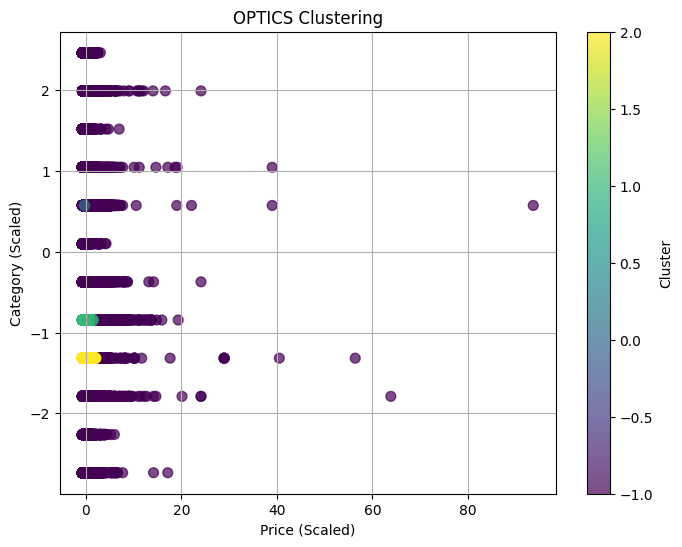

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler

# Assuming 'df_ppd_subset' is your DataFrame containing the data

try:
    # Check for missing values
    missing_values = df_ppd_subset.isnull().sum()

    # Check data types
    data_types = df_ppd_subset.dtypes


    # Check if there are no missing values and correct data types
    if missing_values['price_mmnorm'] == 0 and missing_values['category_oe'] == 0:
        if data_types['price_mmnorm'] in ['float64', 'int64'] and data_types['category_oe'] in ['float64', 'int64']:
            # Data preprocessing
            scaler = StandardScaler()
            scaled_data = scaler.fit_transform(df_ppd_subset[['price_mmnorm', 'category_oe']])
            
            # OPTICS clustering
            optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
            cluster_labels = optics.fit_predict(scaled_data)
            
            # Visualize clusters
            plt.figure(figsize=(8, 6))
            plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
            plt.xlabel('Price (Scaled)')
            plt.ylabel('Category (Scaled)')
            plt.title('OPTICS Clustering')
            plt.colorbar(label='Cluster')
            plt.grid(True)
            plt.show()
        else:
            print("Data types of 'price_mmnorm' and 'category_oe' columns should be numeric.")
    else:
        print("Missing values found in 'price_mmnorm' or 'category_oe' columns.")

except Exception as e:
    print("An error occurred:", e)

OPTICS captures density variations and outlines more subtle clusters less evident in k-means outputs, providing a more nuanced view of data structure. OPTICS clustering reveals varied cluster structures and potential outliers:
1. Cluster density: Clusters exhibit different densities, with some tightly packed (e.g., central green cluster), while others form looser groups (e.g., upper right clusters).
2. Cluster separation: Some clusters are visually distinct (e.g., green and blue), while others have less clear boundaries, suggesting potential overlap or transitional regions.
3. Outliers: Several isolated points are identified, particularly at lower price ranges and category values, potentially indicating outliers or atypical data points.
4. Noise: The cluster at the very bottom might represent noise rather than a meaningful grouping.

**Birch Clustering**

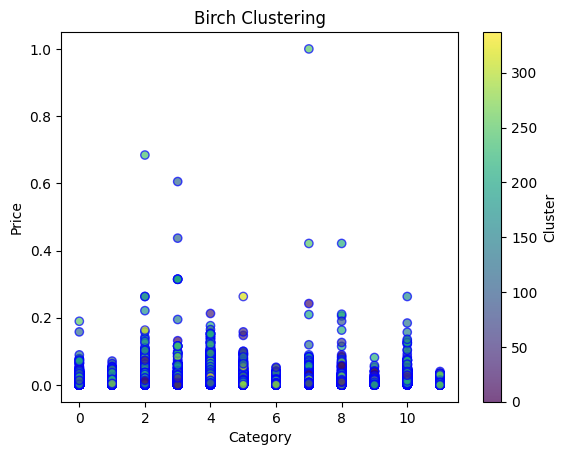

In [36]:
import matplotlib.pyplot as plt
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import Birch

# Generating 600 samples using make_blobs
new_train_df=df_ppd_subset[['membership_level_oe','category_oe','type_oe','location_oe','price_mmnorm']]

# Creating the BIRCH clustering model
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)

# Fit the data (Training)
model.fit(new_train_df)

# Predict the same data
pred = model.predict(new_train_df)

# Creating a scatter plot
plt.scatter(new_train_df['category_oe'], new_train_df['price_mmnorm'], c = pred, cmap = 'viridis', alpha = 0.7, edgecolors = 'b')
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Birch Clustering')
plt.colorbar(label='Cluster')

plt.show()

The scatter plot shows data points colored by their assigned cluster from Birch clustering. While there isn't a clear separation into distinct clusters like k-means, there are hints of possible cluster formations. We can see:
1. Density variations: Areas with denser data points (e.g., upper left and lower right corners) might represent clusters.
2. Sparse regions: Less dense areas (e.g., center) could indicate transitions between clusters or areas with high data variability.

Birch doesn't explicitly define a fixed number of clusters. It identifies dense regions and potential hierarchies, which may require further analysis or interpretation to determine the most suitable number of clusters for your specific needs.

# 6. FINDINGS & OBSERVATIONS

**Clustering Approaches Compared:**
This analysis compares three clustering algorithms: k-means, OPTICS, and Birch. All three aim to identify groups (clusters) within your data based on similarities between data points.
1. **k-means**: This is a centroid-based method that requires specifying the desired number of clusters upfront. It iteratively adjusts cluster centroids to minimize the distance between points and their assigned cluster center.
2. **OPTICS**: This density-based method doesn't require predefining the number of clusters. It identifies clusters based on data point density and reachability distances. OPTICS can capture clusters of different densities and potentially uncover outliers.
3. **Birch**: This hierarchical method also doesn't require specifying the number of clusters. It builds a tree-like structure to represent data density and potential cluster hierarchies. Birch can handle large datasets efficiently but requires further analysis to define meaningful clusters.

**Strengths and Weaknesses:**
1. **k-means**: It's simple, efficient, and interpretable, but requires specifying the number of clusters, which can be challenging. It might struggle with data that doesn't form well-separated spherical clusters.
2. **OPTICS**: It's flexible and adapts to data density variations, potentially revealing more nuanced cluster structures. However, interpreting the results and defining meaningful clusters might require additional steps.
3. **Birch**: It's efficient for large datasets and doesn't require predefining cluster numbers. However, Birch doesn't provide a clear visual separation of clusters and needs further analysis to determine the best number of clusters for your needs.

**Choosing the Best Approach:**

The best choice depends on the data characteristics and analysis goals.
1. If we have a good understanding of the number of underlying clusters and the data forms well-separated groups, k-means could be a good starting point.
2. If our data has varying densities or we want to explore potential outliers, OPTICS might be a better choice.
3. If dealing with large datasets and the number of clusters isn't immediately clear, Birch can be a starting point, but further analysis is needed to refine the results.

# 7. MANAGERIAL INSIGHTS

This clustering analysis explored three techniques (k-means, OPTICS, and Birch) to identify groups (clusters) within your customer data. While all three aim to find similarities, they have key differences. K-means is fast and interpretable, but requires predefining cluster numbers. OPTICS is flexible and adapts to data density, potentially revealing more nuanced customer segments. Birch is efficient for large datasets but requires further analysis to define meaningful clusters.

The best approach depends on your goals. If we have a good idea of the number of customer segments, k-means could be a good starting point. If you want to explore potential variations in customer behavior, OPTICS might be better. Birch can be a starting point for large datasets, but further analysis is needed. Ultimately, the chosen approach should effectively capture meaningful customer segments that can inform our marketing strategies, product development, or customer relationship management efforts.